![ieseg logo](./img/ieseg.png)

#### MBD 2021-2022
# Statistical & Machine Learning Approaches for Marketing

## Section 1: Introduction & Linear Regression

### 1. Import all required libraries and datasets

In [1]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(plotrix)     # Draw circle
library(rgl)         # 3D plots

# Dataset
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
# options(repr.plot.width=4, repr.plot.height=4)

R.version.string

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:mlr':

    train



Attaching package: 'rgl'


The following object is masked from 'package:plotrix':

    mtext3d




[1] "R version 4.0.5 (2021-03-31)"

In [2]:
# Install missing packages
install.packages(c("data.table", "mlr", "caret", "ggplot2", "plotrix", "rgl", "ISLR", "MASS", "datasets"))

Warning message:
"packages 'data.table', 'mlr', 'caret', 'ggplot2', 'plotrix', 'rgl', 'ISLR', 'MASS', 'datasets' are in use and will not be installed"


## Homework
- Exercise 2 (p.52, Chap.2), 10 (p.56, Chap.2), 3 (p.120, Chap.3), 10 (p.123, Chap.3) and 15 (p.126, Chap.3).

In [70]:
# Exercise 2 (p.52, Chap.2)

# 2. Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n and p.
# (a) We collect a set of data on the top 500 firms in the US. For each
# firm we record profit, number of employees, industry and the
# CEO salary. We are interested in understanding which factors
# affect CEO salary.
# 




In [ ]:
# (b) We are considering launching a new product and wish to know
# whether it will be a success or a failure. We collect data on 20
# similar products that were previously launched. For each product we have recorded whether it was a success or failure, price
# charged for the product, marketing budget, competition price,
# and ten other variables.
# (c) We are interesting in predicting the % change in the US dollar in
# relation to the weekly changes in the world stock markets. Hence
# we collect weekly data for all of 2012. For each week we record
# the % change in the dollar, the % change in the US market,
# the % change in the British market, and the % change in the
# German market

# 10 (p.56, Chap.2)

In [26]:
# 10 (p.56, Chap.2)
library(MASS)
# Boston
?Boston
nrow(Boston)
ncol(Boston)

[1] 506

[1] 14

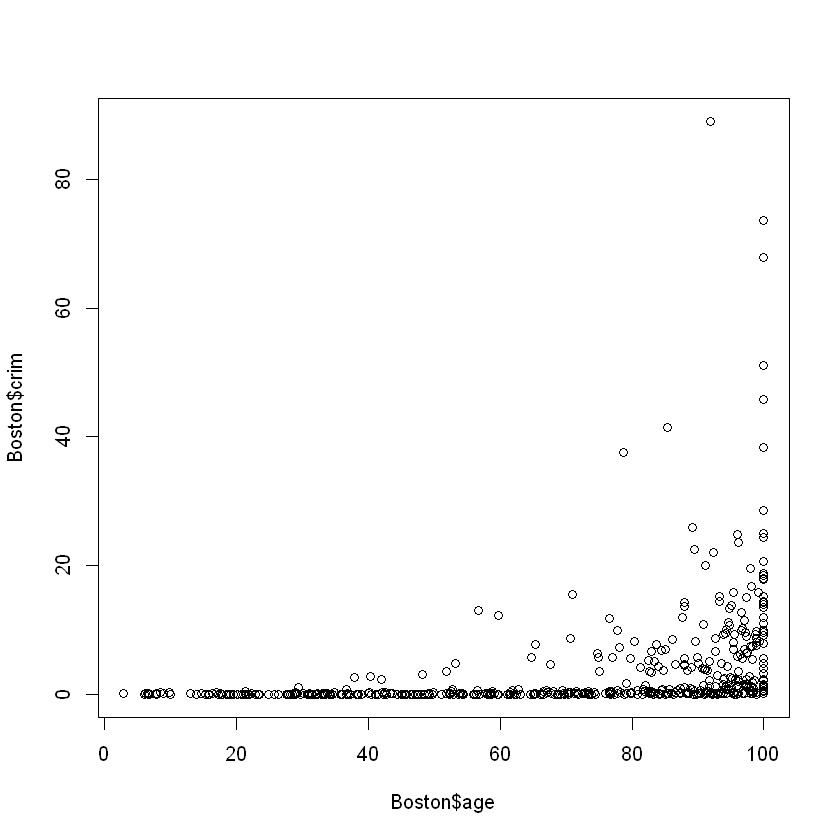

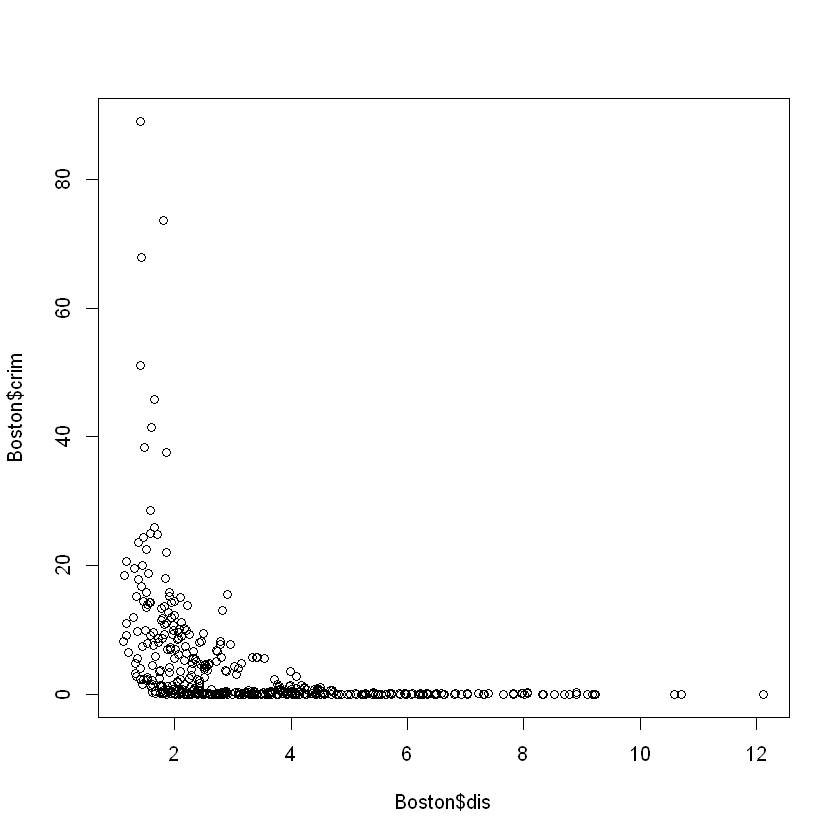

In [29]:
par(mfrow = c(1, 1))
plot(Boston$age, Boston$crim)
plot(Boston$dis, Boston$crim)

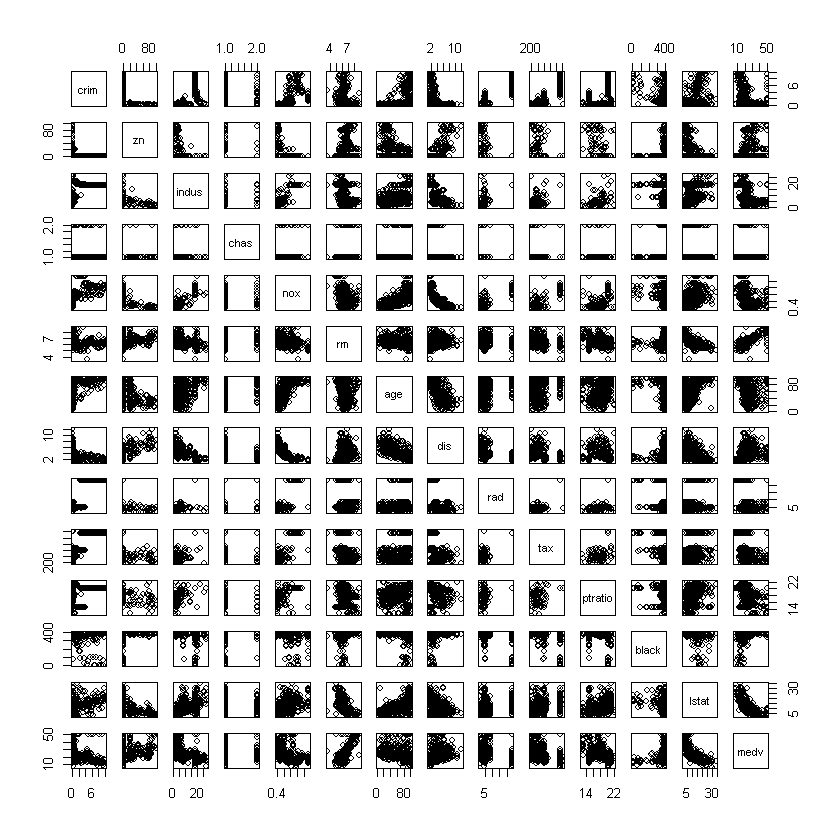

In [32]:
# C. Are any of the predictors associated with per capita crime rate? If so, explain the relationship.
pairs(Boston[Boston$crim < 10, ])
# There might be a relationship age, dis, nox and medv.

[1] 30

[1] 132

[1] 201

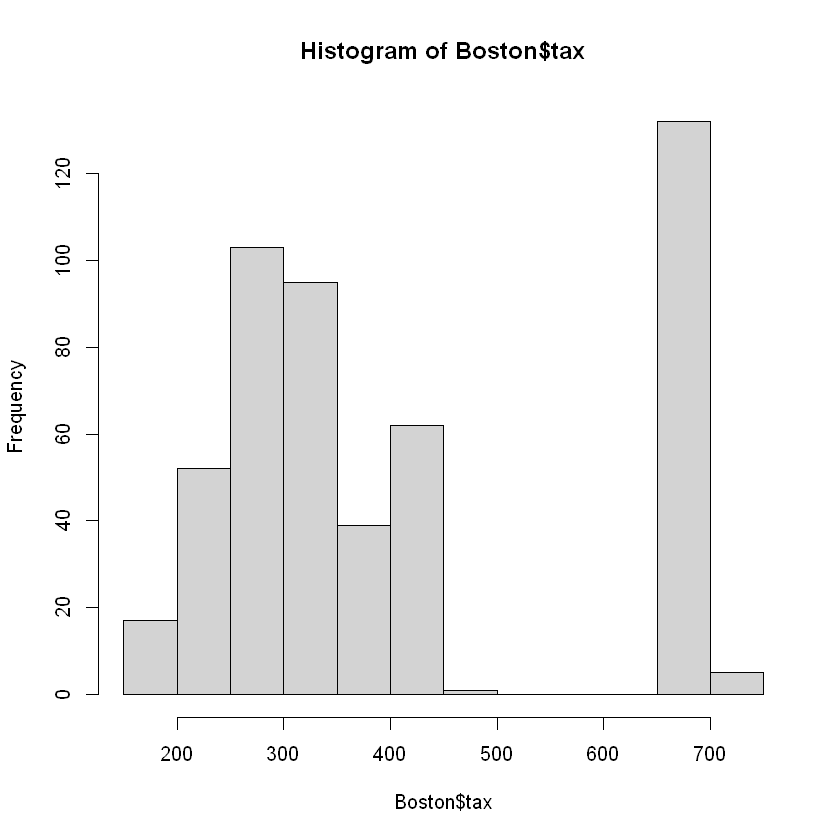

In [37]:
# D. Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on
# the range of each predictor.
nrow(Boston[Boston$crim > 15, ])
hist(Boston$tax)
nrow(Boston[Boston$tax == 666, ])
nrow(Boston[Boston$ptratio > 20, ])

In [38]:
# E. How many of the suburbs in this data set bound the Charles river ?
nrow(Boston[Boston$chas == 1, ])

[1] 35

In [39]:
# F. What is the median pupil-teacher ratio among the towns in this data set?
median(Boston$ptratio)

[1] 19.05

In [42]:
# G. Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors
# for that suburb, and how do those values compare to the overall
# ranges for those predictors? Comment on your findings.
row.names(Boston[min(Boston$medv), ])
range(Boston$tax)
Boston[min(Boston$medv), ]$tax

[1] "5"

[1] 187 711

[1] 222

In [44]:
# H. In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling?
# Comment on the suburbs that average more than eight rooms per dwelling.

nrow(Boston[Boston$rm > 7, ])
nrow(Boston[Boston$rm > 8, ])

[1] 64

[1] 13

# 3 (p.120, Chap.3)

Suppose we have a data set with five predictors, X1 = GPA, X2 = IQ,
X3 = Gender (1 for Female and 0 for Male), X4 = Interaction between
GPA and IQ, and X5 = Interaction between GPA and Gender. The
response is starting salary after graduation (in thousands of dollars).
Suppose we use least squares to fit the model, and get βˆ0 = 50, βˆ1 =
20, βˆ2 = 0.07, βˆ3 = 35, βˆ4 = 0.01, βˆ5 = −10.
             
(a) Which answer is correct, and why?
i. For a fixed value of IQ and GPA, males earn more on average
than females.
ii. For a fixed value of IQ and GPA, females earn more on
average than males.
iii. For a fixed value of IQ and GPA, males earn more on average
than females provided that the GPA is high enough.
iv. For a fixed value of IQ and GPA, females earn more on
average than males provided that the GPA is high enough.
(b) Predict the salary of a female with IQ of 110 and a GPA of 4.0.
(c) True or false: Since the coefficient for the GPA/IQ interaction
term is very small, there is very little evidence of an interaction
effect. Justify your answer.
             
a. The least Square Line:
y^=50+20GPA+0.07IQ+35Gender+0.01GPA×IQ−10GPA×Gender
males:
y^=50+20GPA+0.07IQ+0.01GPA×IQ,
females:
y^=85+10GPA+0.07IQ+0.01GPA×IQ.
the right answer is iii. 

b. 137.100
c. False


# 10 (p.123, Chap.3)

In [56]:
# 10. This question should be answered using the Carseats data set.
# (a) Fit a multiple regression model to predict Sales using Price,
# Urban, and US.
library("ISLR")
# ?Carseats
head(Carseats)
lm.fit = lm(Sales ~ Price+Urban+US, data= Carseats)
summary(lm.fit)




,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes



Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


In [46]:
# (b) Provide an interpretation of each coefficient in the model. Be
# careful—some of the variables in the model are qualitative!

# When price increases by 1.000 sales decrease by 54
# Store sales are not affected by the Urban feature.
# Stores in the US sale 1.200 more than other stores.

In [48]:
# (d) For which of the predictors can you reject the null hypothesis
# H0 : βj = 0?
# The feature Urban has a p value not significant of 0.936.


In [57]:

# (e) On the basis of your response to the previous question, fit a
# smaller model that only uses the predictors for which there is
# evidence of association with the outcome.
lm.fit2 = lm(Sales ~ Price+US, data= Carseats)
summary(lm.fit2)


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


In [60]:
# (f) How well do the models in (a) and (e) fit the data?
# these are not accurate models because the R squared is low.

In [61]:
# (g) Using the model from (e), obtain 95 % confidence intervals for
# the coefficient(s).
confint(lm.fit2)




,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


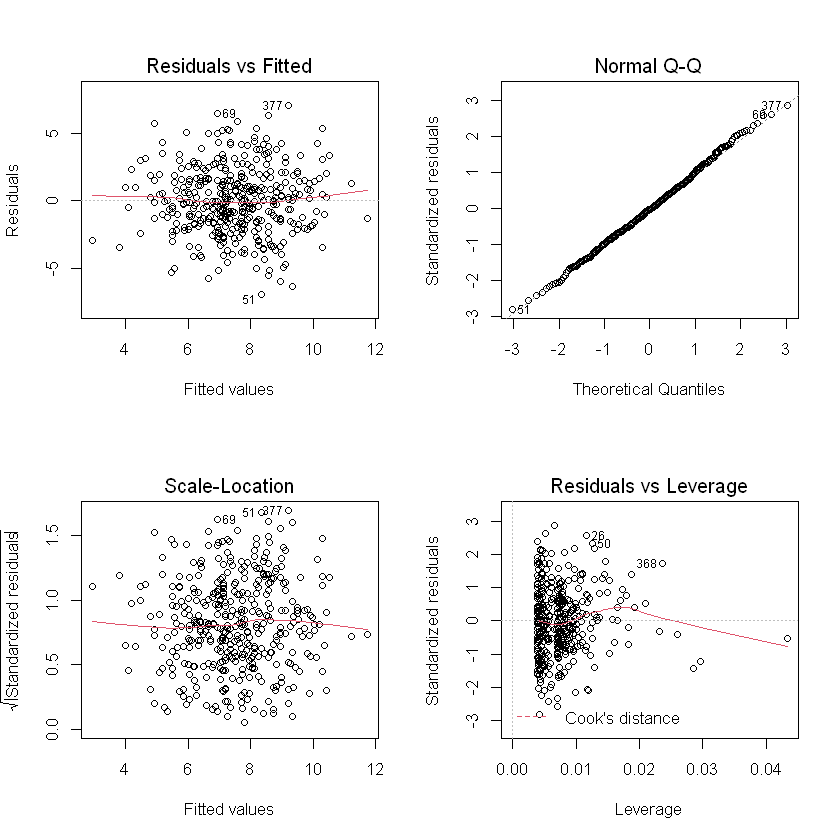

In [64]:

# (h) Is there evidence of outliers or high leverage observations in the
# model from (e)
par(mfrow=c(2,2))
plot(lm.fit2)
# there is no evidence of outliers

# 15 (p.126, Chap.3)

The following objects are masked from Boston (pos = 3):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn


The following objects are masked from Boston (pos = 4):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn





Call:
lm(formula = crim ~ zn)

Residuals:
   Min     1Q Median     3Q    Max 
-4.429 -4.222 -2.620  1.250 84.523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.45369    0.41722  10.675  < 2e-16 ***
zn          -0.07393    0.01609  -4.594 5.51e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.435 on 504 degrees of freedom
Multiple R-squared:  0.04019,	Adjusted R-squared:  0.03828 
F-statistic:  21.1 on 1 and 504 DF,  p-value: 5.506e-06


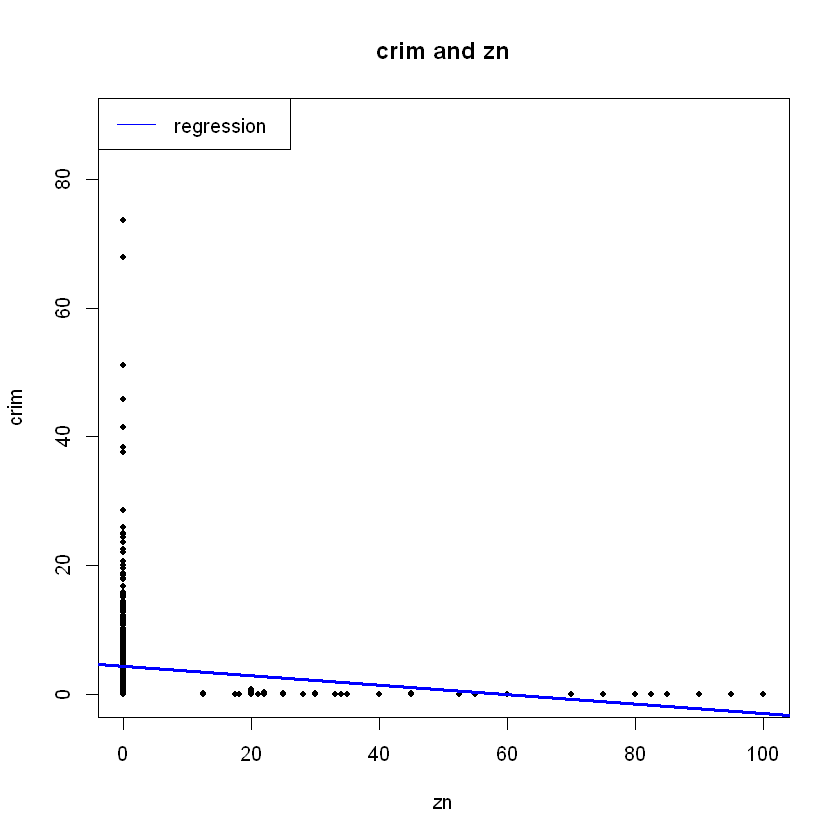

In [69]:
# This problem involves the Boston data set, which we saw in the lab
# for this chapter. We will now try to predict per capita crime rate
# using the other variables in this data set. In other words, per capita
# crime rate is the response, and the other variables are the predictors.
# (a) For each predictor, fit a simple linear regression model to predict
# the response. Describe your results. In which of the models is
# there a statistically significant association between the predictor
# and the response? Create some plots to back up your assertions.

library(MASS)
#reading the Boston Dataset
data("Boston")
attach(Boston)
linear_fit.zn <- lm(crim ~zn)
summary(linear_fit.zn)

plot(zn,crim,pch = 20, main = "crim and zn")
abline(linear_fit.zn,col = "blue",lwd = 3)
legend("topleft", c( "regression"), col = c("blue"), lty = c(1, 1))

In [ ]:
# (b) Fit a multiple regression model to predict the response using
# all of the predictors. Describe your results. For which predictors
# can we reject the null hypothesis H0 : βj = 0?


In [ ]:
# (c) How do your results from (a) compare to your results from (b)?
# Create a plot displaying the univariate regression coefficients
# from (a) on the x-axis, and the multiple regression coefficients
# from (b) on the y-axis. That is, each predictor is displayed as a
# single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate
# in the multiple linear regression model is shown on the y-axis.


In [ ]:
# (d) Is there evidence of non-linear association between any of the
# predictors and the response? To answer this question, for each
# predictor X, fit a model of the form